# Introduction to pandas


## Motivation

So far, we have encountered built-in Python containers (`list`, `tuple`, `dict`) 
and NumPy arrays as the only way to store data.
However, while NumPy arrays are great for storing *homogenous* data
without any particular structure, they are somewhat limited when
we want to use them for data analysis.

For example, we usually want to process data sets with

1.  several variables;
2.  multiple observations, which need not be identical across
    variables (some values may be missing);
3.  non-homogenous data types: for examples,
    names need to be stored as strings, birthdays as dates and income as
    a floating-point number.

While NumPy can in principle handle such situations, it puts all the
burden on the user. Most users would prefer to not have to deal
with such low-level details.

Pandas was created to offer more versatile data structures that are
straightforward to use for storing, manipulating and analyzing
heterogeneous data:

1.  Data is clearly organized in *variables* and *observations*, similar
    to econometrics programs such as Stata and R using `data.frame`.

2.  Each variable is permitted to have a *different* data type.

3.  We can use *labels* to select observations instead of having to use
    a linear numerical index as with NumPy.

    We could, for example, index a data set using National Insurance Numbers
    or time stamps for time series data.

4.  Pandas offers many convenient data aggregation and reduction
    routines that can be applied to subsets of data.

    For example, we can easily group observations by city and compute average
    incomes.

5.  Pandas also offers many convenient data import / export functions that
    go beyond what's in NumPy.

Should we be using pandas at all times, then? No!

-   For low-level tasks where performance is essential, use NumPy.
-   For homogenous data without any particular data structure, use NumPy.
-   On the other hand, if data is heterogeneous, needs to be imported from
    an external data source and cleaned or transformed before
    performing computations, use pandas.

There are numerous tutorials on pandas on the internet.
Useful additional material includes:

-   The official [user guide](https://pandas.pydata.org/docs/user_guide/index.html).
-   The official [pandas cheat sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)
    which nicely illustrates the most frequently used operations.
-   The official [API reference](https://pandas.pydata.org/docs/reference/index.html) with details on
    every pandas object and function.
-   There are numerous tutorials (including videos) available
    on the internet. See [here](https://pandas.pydata.org/docs/getting_started/tutorials.html)
    for a list.

***
## Creating pandas data structures

Pandas has two main data structures:

1.  [`Series`](https://pandas.pydata.org/docs/reference/series.html) 
    represents observations of a *single* variable.
2.  [`DataFrame`](https://pandas.pydata.org/docs/reference/frame.html) 
    is a container for *several* variables. You can think
    of each individual column of a `DataFrame` as a `Series`,
    and each row represents one observation.

The easiest way to create a `Series` or `DataFrame` is to create
them from pre-existing data.

To access pandas data structures and routines, we need to import them first.
The near-universal convention is to make pandas available using the name `pd`:
```python
import pandas as pd
```

*Example: Create Series from 1-dimensional NumPy array*

In [1]:
import numpy as np
import pandas as pd             # universal convention: import using pd

data = np.arange(5, 10)

# Create pandas Series from 1d array
pd.Series(data)

0    5
1    6
2    7
3    8
4    9
dtype: int64

*Example: Create DataFrame from NumPy array*

We can create a `DataFrame` from a NumPy array:

In [2]:
# Create matrix of data
data = np.arange(15).reshape((-1, 3))

# Define variable (or column) names
varnames = ['A', 'B', 'C']

# Create pandas DataFrame from matrix
pd.DataFrame(data, columns=varnames)

,A,B,C
0,0,1,2
1,3,4,5
2,6,7,8
3,9,10,11
4,12,13,14


This code creates a `DataFrame` of three variables called `A`, `B` and `C`
with 5 observations each.

*Example: Create DataFrame from dictionary*

Alternatively, we can create a `DataFrame` from non-homogenous data as follows:

In [3]:
# Names (strings)
names = ['Alice', 'Bob']

# Birth dates (datetime objects)
bdates = pd.to_datetime(['1985-01-01', '1997-05-12'])

# Incomes (floats)
incomes = np.array([600000, np.nan])         # code missing income as NaN

# create DataFrame from dictionary
pd.DataFrame({'Name': names, 'Birthdate': bdates, 'Income': incomes})

,Name,Birthdate,Income
0,Alice,1985-01-01,600000.0
1,Bob,1997-05-12,NaN


If data types differ across columns, as in the above example,
it is often convenient to create the `DataFrame` by passing
a dictionary as an argument. Each key represents a column name
and each corresponding value contains the data for that variable.

***
## Importing data

### Loading data with NumPy & its limitations

We often use files that store data
as text files containing character-separated values (CSV) since virtually
any application supports this data format.
The most important functions to read text data are:

-   [`np.loadtxt()`](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html):     load data from a text file.
-   [`np.genfromtxt()`](https://numpy.org/doc/stable/reference/generated/numpy.genfromtxt.html): 
    load data from a text file and handle missing data.

There are a few other input/output functions in NumPy, for example to
write arrays as raw binary data.
We won't cover them here, but you can find them in the
[official documentation](https://numpy.org/doc/stable/reference/routines.io.html).

*Example: Load character-separated text data*

Consider the following tabular data from [FRED](https://fred.stlouisfed.org/) stored in the file 
[FRED_annual.csv](../../data/FRED/FRED_annual.csv) where the first two rows
look as follows:

| Year |  GDP   |  CPI | UNRATE | FEDFUNDS | INFLATION |
| ---- | ------ | ---- | ------ | -------- | --------- |
| 1954 | 2877.7 | 26.9 | 5.6    | 1.0      |           |
| 1955 | 3083.0 | 26.8 | 4.4    | 1.8      | -0.4      |

Note that the inflation column has a missing value for the year 1954.

These data are stored as character-separated values (CSV).
To load this CSV file as a NumPy array, we use [`loadtxt()`]((https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html)). 
It is advantageous to globally set the path to the `data/` directory that can point either to the local directory or to the `data/` directory on GitHub.

In [4]:
# Uncomment this to use files in the local data/ directory
DATA_PATH = '../../data'

# Load data directly from GitHub
# DATA_PATH = 'https://raw.githubusercontent.com/richardfoltyn/FIE463-V26/main/data'

In [5]:
import numpy as np

# Path to CSV file
file = f'{DATA_PATH}/FRED/FRED_annual.csv'

# load CSV, skip header row and first row with missing data
data = np.loadtxt(file, skiprows=2, delimiter=',')

data[:2]        # Display first two rows

array([[ 1.9550e+03,  3.0830e+03,  2.6800e+01,  4.4000e+00,  1.8000e+00,
        -4.0000e-01],
       [ 1.9560e+03,  3.1488e+03,  2.7200e+01,  4.1000e+00,  2.7000e+00,
         1.5000e+00]])

The default settings will in many cases be appropriate to load
whatever CSV file we might have. However, we'll occasionally
want to specify the following arguments to override the defaults:

-   `delimiter`: Character used to separate individual fields (default: space).
-   `skiprows=n`: Skip the first `n` rows. For example, if the CSV file
    contains a header with variable names, `skiprows=1` needs to be
    specified as NumPy by default cannot process these names.
-   `encoding`: Set the character encoding of the input data. This
    is usually not needed, but can be required to import data
    with non-latin characters that are not encoded using Unicode.

While [`loadtxt()`](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html) is simple to use, it quickly reaches its limits
with more complex data sets.
For example, when we try to load the FRED data set including the first data row, we get the following error:

In [6]:
# Attempt to load CSV
data = np.loadtxt(file, skiprows=1, delimiter=',')

ValueError: could not convert string '' to float64 at row 0, column 6.

This code fails because [`loadtxt()`](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html) does not support files with missing values. One can use the more flexible function [`np.genfromtxt()`](https://numpy.org/doc/stable/reference/generated/numpy.genfromtxt.html) which allows us to parse files with missing values:

In [7]:
# Load CSV file using genfromtxt() instead of loadtxt()
data = np.genfromtxt(file, skip_header=True, delimiter=',')

# Display first rows
data[:1]

array([[1.9540e+03, 2.8777e+03, 2.6900e+01, 5.6000e+00, 1.0000e+00,
               nan]])

However, it is usually not worthwhile to figure out how to load complex data with NumPy as this is much easier with pandas.

***
### Loading data with Pandas

Pandas's input/output routines are more powerful than those implemented in NumPy:

-   They support reading and writing numerous file formats.
-   They support heterogeneous data without having to specify
    the data type in advance.
-   They gracefully handle missing values.

For these reasons, it is often preferable to directly use pandas to
process data instead of NumPy.

The most important functions are:

-   [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html), 
    [`to_csv()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html): 
    Read or write CSV text files.
-   [`read_fwf()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_fwf.html): 
    Read data with fixed field widths, i.e., text data
    that does not use delimiters to separate fields.
-   [`read_excel()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html), 
    [`to_excel()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_excel.html): 
    Read or write Excel spreadsheets.
-   [`read_stata()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_stata.html), 
    [`to_stata()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_stata.html): 
    Read or write Stata's `.dta` files.

For a complete list of I/O routines, see the [official documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html).

To illustrate, we repeat the above examples using pandas's
[`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html):

In [8]:
import pandas as pd

# Path to CSV file
file = f'{DATA_PATH}/FRED/FRED_annual.csv'

df = pd.read_csv(file, sep=',')
df.head(2)          # Display the first 2 rows of data

,Year,GDP,CPI,UNRATE,FEDFUNDS,INFLATION
0,1954,2877.7,26.9,5.6,1.0,NaN
1,1955,3083.0,26.8,4.4,1.8,-0.4


<div style="background-color: #c6dbef; color: #363636; padding: 0.8em 1em 0.5em 1em; border: 1pt solid #363636;">
<h3 style="font-weight: bold;">Your turn</h3>
Use the pandas functions listed above to import data from the following files located in the <TT>data</TT> folder:
<ol>
    <li>titanic.csv</li>
    <li>FRED/FRED_annual.xlsx</li>
</ol>

To load Excel files, you need to have the package <TT>openpyxl</TT> installed.
</div>
<span style="display: none;">YourTurnEnd</span>

***
## Viewing data

With large data sets, you hardly ever want to print the entire `DataFrame`.
Pandas by default limits the amount of data shown. You can
use the [`head()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html) 
and [`tail()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.tail.html) 
methods to explicitly display a specific
number of rows from the top or the end of a `DataFrame`.

To illustrate, we use a data set of passengers on board of the Titanic's
maiden voyage stored in `titanic.csv` which contains the following columns:

1.  `PassengerId`
2.  `Survived`: indicator whether the person survived
3.  `Pclass`: accommodation class (first, second, third)
4.  `Name`: Name of passenger (last name, first name)
5.  `Sex`: `male` or `female`
6.  `Age`
7.  `Ticket`: Ticket number
8.  `Fare`: Fare in pounds
9.  `Cabin`: Deck + cabin number
10. `Embarked`: Port at which passenger embarked:
    `C` - Cherbourg, `Q` - Queenstown, `S` - Southampton

We can read in the data stored in the file `titanic.csv` like this:

In [9]:
import pandas as pd

# URL to CSV file in GitHub repository
file = f'{DATA_PATH}/titanic.csv'

# Load sample data set of Titanic passengers. Individual fields are separated
# using a comma, which is the default.
df = pd.read_csv(file, sep=',')

We can now display the first and last three rows:

In [10]:
df.head(3)      # show first three rows

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S


In [11]:
df.tail(3)      # show last three rows

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss Catherine Helen ""Carrie""",female,NaN,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,370376,7.75,NaN,Q


To quickly compute some descriptive statistics for the
*numerical* variables in the `DataFrame`, we use 
[`describe()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html):

In [12]:
df.describe()

,PassengerId,Survived,Pclass,Age,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,32.204208
std,257.353842,0.486592,0.836071,14.526497,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,512.329200


Note that this automatically ignores the columns `Name`, `Sex`, `Ticket`
and `Cabin` as they contain strings, and computing the mean, standard deviation, etc.
of a string variable does not make sense.

For categorical data, we can use 
[`value_counts()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html)
to tabulate the number of unique values of a variable. For example, the following code tabulates passengers by sex:

In [13]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

Lastly, to see low-level information about the data type
used in each column and the number of non-missing observations, we call 
[`info()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html):

In [14]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   Ticket       891 non-null    object 
 7   Fare         891 non-null    float64
 8   Cabin        204 non-null    object 
 9   Embarked     889 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 69.7+ KB


Pandas automatically discards missing information
in computations. For example, the age column has several missing values, 
so the number of reported `Non-Null` values is lower than for the other columns.

***
## Indexing

Pandas supports two types of indexing:

1.  Indexing by position. This is basically identical to the
    indexing of other Python and NumPy containers.
2.  Indexing by label, i.e., by the values assigned to the row or column index.
    These labels need not be integers in increasing order, as is the case
    for NumPy.
    We will see how to assign labels below.

Pandas indexing is performed either by using brackets `[]`, or by using
`.loc[]` for label indexing, or `.iloc[]` for positional indexing.

Indexing via `[]` can be somewhat confusing:

-   specifying `df['name']` returns the column `name` as a `Series` object.
-   On the other hand, specifying a range such as `df[5:10]` returns the *rows*
    associated with the *positions* 5,...,9.

*Example: Selecting columns*

In [15]:
import pandas as pd

# Set option to limit the number of rows displayed
pd.set_option('display.max_rows', 10)

# Load sample data of Titanic passengers
df = pd.read_csv(f'{DATA_PATH}/titanic.csv')
df['Name']               # select a single column

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                  Heikkinen, Miss Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                          Graham, Miss Margaret Edith
888              Johnston, Miss Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [16]:
df[['Name', 'Sex']]     # select multiple columns using a list

,Name,Sex
0,"Braund, Mr. Owen Harris",male
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female
2,"Heikkinen, Miss Laina",female
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female
4,"Allen, Mr. William Henry",male
...,...,...
886,"Montvila, Rev. Juozas",male
887,"Graham, Miss Margaret Edith",female
888,"Johnston, Miss Catherine Helen ""Carrie""",female
889,"Behr, Mr. Karl Howell",male


Note: In order to select multiple columns you *must* specify these as a `list`, not a `tuple`.

*Example: Selecting rows by position*

To return the rows at positions 1, 2 and 3 we use

In [17]:
df[1:4]

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S


Pandas follows the Python convention that indices are 0-based, and the
endpoint of a slice is not included.

### Creating and manipulating indices

Pandas uses *labels* to index and align
data. These can be integer values starting at 0 with increments of 1
for each additional element, which is the default, but they need not be.
The three main methods to create/manipulate indices are:

1.   Create a new `Series` or `DataFrame` object with a custom index
    using the `index` argument.
2.   [`set_index(keys=['column1', ...])`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html)
    uses the values of `column1`
    and optionally additional columns as indices, discarding the current index.
3.   [`reset_index()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html) 
    resets the index to its default value, a sequence
    of increasing integers starting at 0.

#### Creating custom indices

First, consider the following code which creates a `Series` with 
three elements `[10, 20, 30]` using the default index `[0, 1, 2]`:

In [18]:
import pandas as pd

# Create Series with default integer index
pd.Series([10, 20, 30])

0    10
1    20
2    30
dtype: int64

We can use the `index` argument to specify a custom index, for example
one containing the lower-case characters `a`, `b`, `c` as follows:

In [19]:
# Create Series with custom index [a, b, c]
pd.Series([10, 20, 30], index=['a', 'b', 'c'])

a    10
b    20
c    30
dtype: int64

#### Manipulating indices

To modify the index of an *existing* `Series` or `DataFrame` object, 
we use the methods
[`set_index()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html)
and
[`reset_index()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html).
Note that these return a new object and leave the original `Series` or `DataFrame`
unchanged. If we want to change the existing object, we need
to pass the argument `inplace=True`.

For example, we can replace the row index and use the Roman lower-case
 characters `a`, `b`, `c`, ... as labels
instead of integers:

In [20]:
# Create DataFrame with 2 columns
df = pd.DataFrame({'A': [10, 20, 30], 'B': ['a', 'b', 'c']})

df

,A,B
0,10,a
1,20,b
2,30,c


Since we did not specify any index, the default index $[0, 1, ...]$ is used. 
We can use [`set_index()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html)
set the index to the values from a column, for example column `B`:

In [21]:
# Use column 'B' as index, store result in new DataFrame
df2 = df.set_index('B')

# Display updated DataFrame
df2

,A
B,
a,10
b,20
c,30


Note that pandas operations are usually not in place, so only `df2` uses column `B` as the index, whereas the original `df` remains unchanged:

In [22]:
df

,A,B
0,10,a
1,20,b
2,30,c


We can use the `inplace=True` argument to [`set_index()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html) to update the index in-place, even though the pandas project usually does not encourage users to change things in place:

In [23]:
# Set index in-place, i.e., df is modified
df.set_index('B', inplace=True)

df

,A
B,
a,10
b,20
c,30


Importantly, when changing things in-place, pandas functions usually don't return anything (the return value is `None`), so it is a mistake to attempt to assign the return value to a variable.

We can now use these new labels to select records in the `DataFrame`:

In [24]:
# print first 2 rows using labels
df['a':'b']             # This is the same as df[:2]

,A
B,
a,10
b,20


Note that when specifying a range in terms of
labels, the last element *is* included! Hence the row with index `b`
in the above example is shown.

We can reset the index to its default integer values using
the [`reset_index()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html) method:

In [25]:
# Reset index labels to default value (integers 0, 1, 2, ...) and print 
# first three rows
df.reset_index(drop=True).head(3)

,A
0,10
1,20
2,30


The `drop=True` argument tells pandas to throw away the old index
values instead of storing them as a column of the resulting `DataFrame`.

<div style="background-color: #c6dbef; color: #363636; padding: 0.8em 1em 0.5em 1em; border: 1pt solid #363636;">
<h3 style="font-weight: bold;">Your turn</h3>
Read in the following data files from the <TT>data/FRED</TT> folder and manipulate the dataframe index:
<ol>
    <li>Read in the file <TT>FRED_annual.csv</TT> and set the column <TT>Year</TT> as the index.</li>
    <li>Read in the file <TT>FRED_monthly.csv</TT> and set the columns <TT>Year</TT> and <TT>Month</TT> as the index</li>
</ol>
Experiment what happens if you use the <TT>inplace=True</TT> and <TT>append=True</TT> options of <TT>set_index()</TT>.

Restore the original (default) index after you are done.
</div>
<span style="display: none;">YourTurnEnd</span>

### Selecting elements

To more clearly distinguish between selection by label and by position,
pandas provides the [`.loc[]`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html) and 
[`.iloc[]`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html) methods of indexing.
To make your intention obvious, you should therefore adhere to the following
rules:

1.  Use `df['name']` only to select *columns* and nothing else.
2.  Use `.loc[]` to select by label.
3.  Use `.iloc[]` to select by position.

**Selection by label**

To illustrate, using `.loc[]` unambiguously indexes by label. First we create a demo data set with 3 columns and 5 rows:

In [26]:
# Create demo data with 3 columns and 5 rows

# Column labels
columns = ['X', 'Y', 'Z']
# Row labels
rows = ['a', 'b', 'c', 'd', 'e']

values = np.arange(len(rows))

# Create data dictionary
data = {col: [f'{col}{val}' for val in values] for col in columns}

# Create DataFrame from dictionary
df = pd.DataFrame(data, index=rows)

We now use `.loc[]` to select rows and columns by label:

In [27]:
# Select rows 'b' to 'e', and columns 'X' and 'Y'
df.loc["b":"e", ["X", "Y"]]

,X,Y
b,X1,Y1
c,X2,Y2
d,X3,Y3
e,X4,Y4


With `.loc[]` we can even perform slicing on column names, which
is not possible with the simpler `df[]` syntax:

In [28]:
df.loc['b':'e', 'X':'Z']

,X,Y,Z
b,X1,Y1,Z1
c,X2,Y2,Z2
d,X3,Y3,Z3
e,X4,Y4,Z4


This includes all the columns between `X` and `Z`,
where the latter is included since we are slicing by label.

Trying to pass in positional arguments will return an error for
the given `DataFrame` since the index labels are `a`, `b`, `c`,...
and not 0, 1, 2...

In [29]:
df.loc[0:4]

TypeError: cannot do slice indexing on Index with these indexers [0] of type int

However, we can reset the index to its default value. Then
the index labels are integers and coincide with their position,
so that `.loc[]` works:

In [30]:
df = df.reset_index(drop=True)      # reset index labels to integers,
                                    # drop original index
df.loc[0:4]

,X,Y,Z
0,X0,Y0,Z0
1,X1,Y1,Z1
2,X2,Y2,Z2
3,X3,Y3,Z3
4,X4,Y4,Z4


Again, the end point with label `4` is included because we
are selecting by label.

Indexing via `.loc[]` supports a few more types of arguments,
see the [official documentation](https://pandas.pydata.org/docs/user_guide/indexing.html#selection-by-label)
for details.

**Selection by position**

Conversely, if we want to select items exclusively by their position
and ignore their labels, we use `.iloc[]`:

In [31]:
df.iloc[0:4, 0:2]           # select first 4 rows, first 2 columns

,X,Y
0,X0,Y0
1,X1,Y1
2,X2,Y2
3,X3,Y3


Again, `.iloc[]` supports a multitude of other arguments, see the [official documentation](https://pandas.pydata.org/docs/user_guide/indexing.html#selection-by-position)
for details.

**Boolean indexing**

Similar to NumPy, pandas allows us to select a subset of rows in a `Series` or `DataFrame`
if they satisfy some condition. The simplest use case is to create a 
column of boolean values (`True` or `False`) as a result of some logical operation:


 This even works without
explicitly using the `.loc[]` attribute:

In [32]:
import pandas as pd

# Read in Titanic passenger data
df = pd.read_csv(f'{DATA_PATH}/titanic.csv')

# Check whether passenger embarked in Southampton 
df['Embarked'] == "S"

0       True
1      False
2       True
3       True
4       True
       ...  
886     True
887     True
888     True
889    False
890    False
Name: Embarked, Length: 891, dtype: bool

Such boolean arrays can be used to select a subset of entries:

In [33]:
df.loc[df['Embarked'] == 'S', 'Name':'Age']

,Name,Sex,Age
0,"Braund, Mr. Owen Harris",male,22.0
2,"Heikkinen, Miss Laina",female,26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0
4,"Allen, Mr. William Henry",male,35.0
6,"McCarthy, Mr. Timothy J",male,54.0
...,...,...,...
883,"Banfield, Mr. Frederick James",male,28.0
884,"Sutehall, Mr. Henry Jr",male,25.0
886,"Montvila, Rev. Juozas",male,27.0
887,"Graham, Miss Margaret Edith",female,19.0


Boolean indexing also works directly with `[]` without having to specify `.loc[]`, but then it is not possible to also select a subset of columns at the same time:

In [34]:
df[df['Embarked'] == 'S']

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,17463,51.8625,E46,S
...,...,...,...,...,...,...,...,...,...,...
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,SOTON/OQ 392076,7.0500,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss Margaret Edith",female,19.0,112053,30.0000,B42,S


Multiple conditions can be combined using the `&` (logical and) or `|` (logical or) operators:

In [35]:
# Select men who embarked in Southampton
df.loc[(df['Embarked'] == 'S') & (df['Sex'] == 'male'), ['Name', 'Embarked', 'Sex']]

,Name,Embarked,Sex
0,"Braund, Mr. Owen Harris",S,male
4,"Allen, Mr. William Henry",S,male
6,"McCarthy, Mr. Timothy J",S,male
7,"Palsson, Master Gosta Leonard",S,male
12,"Saundercock, Mr. William Henry",S,male
...,...,...,...
878,"Laleff, Mr. Kristo",S,male
881,"Markun, Mr. Johann",S,male
883,"Banfield, Mr. Frederick James",S,male
884,"Sutehall, Mr. Henry Jr",S,male


If we want to include rows where an observation takes on one of multiple values, the 
[`isin()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isin.html)
method can be used:

In [36]:
# Select passengers who embarked in Southampton or Queenstown
df.loc[df['Embarked'].isin(('S', 'Q')), ['Name', 'Embarked']]

,Name,Embarked
0,"Braund, Mr. Owen Harris",S
2,"Heikkinen, Miss Laina",S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",S
4,"Allen, Mr. William Henry",S
5,"Moran, Mr. James",Q
...,...,...
885,"Rice, Mrs. William (Margaret Norton)",Q
886,"Montvila, Rev. Juozas",S
887,"Graham, Miss Margaret Edith",S
888,"Johnston, Miss Catherine Helen ""Carrie""",S


Finally, `DataFrame` implements a [`query()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.query.html)
method which allows us to combine multiple conditions in a single string in an intuitive fashion. 
Column names can be used directly within this string to put restrictions on their values.

In [37]:
# Select passengers who embarked in Southampton and were above age 70
df.query('Embarked == "S" & Age > 70')

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,27042,30.000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,347060,7.775,NaN,S


<div style="background-color: #c6dbef; color: #363636; padding: 0.8em 1em 0.5em 1em; border: 1pt solid #363636;">
<h3 style="font-weight: bold;">Your turn</h3>
Load the Titanic passenger data set <TT>data/titanic.csv</TT> and select the following subsets of data:
<ol>
    <li>Select all passengers with passenger IDs from 10 to 20</li>
    <li>Select the 10th to 20th (inclusive) row of the dataframe</li>
    <li>Using <TT>query()</TT>, select the sub-sample of female passengers aged 30 to 40. Display only the columns <TT>Name</TT>, <TT>Age</TT>, and <TT>Sex</TT> (in that order)</li>
    <li>Repeat the last exercise without using <TT>query()</TT></li>
    <li>Select all men who embarked in Queenstown or Cherbourg</li>
</ol>
</div>
<span style="display: none;">YourTurnEnd</span>

***
# Working with time series data

In economics and finance, we frequently work with time series data, i.e., observations that are associated with a particular point in time (time stamp) or a time period. pandas offers comprehensive support for such data, in particular if the time stamp or time period is used as the index of a `Series` or `DataFrame`.
This section presents a few of the most important concepts, see the official [documentation](https://pandas.pydata.org/docs/user_guide/timeseries.html) for a comprehensive guide.

To illustrate, let's construct a set of daily data for the first three months of 2025, i.e., the period 2025-01-01 to 2025-03-31 using the 
[`date_range()`](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html) function
(we use the data format `YYYY-MM-DD` in this section, but pandas also supports other date formats).

In [38]:
import pandas as pd
import numpy as np

# Create sequence of dates from 2025-01-01 to 2025-03-31
# at daily frequency
index = pd.date_range(start="2025-01-01", end="2025-03-31", freq="D")

# Use date range as index for Series with some artificial data
data = pd.Series(np.arange(len(index)), index=index)

# Print first 5 observations
data.head(5)

2025-01-01    0
2025-01-02    1
2025-01-03    2
2025-01-04    3
2025-01-05    4
Freq: D, dtype: int64

### Indexing with date/time indices

pandas implements several convenient ways to select observations associated with a particular date or a set of dates. For example, if we want to select one specific date, we can pass it as a string to `.loc[]`:

In [39]:
# Select single observation by date
data.loc["2025-01-01"]

np.int64(0)

It is also possible to select a time period by passing a start and end point (where the end point is included, as usual with label-based indexing in pandas):

In [40]:
# Select first 5 days
data.loc["2025-01-01":"2025-01-05"]

2025-01-01    0
2025-01-02    1
2025-01-03    2
2025-01-04    3
2025-01-05    4
Freq: D, dtype: int64

A particularly useful way to index time periods is to pass a partial index. For example, if we want to select all observations from January 2025, we could use the range `'2025-01-01':'2025-01-31'`, but it is much easier to specify the partial index `'2025-01'` instead which includes all observations from January.

In [41]:
# Select all observations from January 2025
data.loc["2025-01"]

2025-01-01     0
2025-01-02     1
2025-01-03     2
2025-01-04     3
2025-01-05     4
              ..
2025-01-27    26
2025-01-28    27
2025-01-29    28
2025-01-30    29
2025-01-31    30
Freq: D, Length: 31, dtype: int64

### Lags, differences, and other useful transformations

When working with time series data, we often need to create lags or leads of a variable (e.g., if we want to include lagged values in a regression model). In pandas, this is done using 
[`shift()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shift.html)
which shifts the index by the desired number of periods (default: 1). For example, invoking
`shift(1)` creates lagged observations of each column in the `DataFrame`:

In [42]:
# Lag observations by 1 period
data.shift(1).head(5)

2025-01-01    NaN
2025-01-02    0.0
2025-01-03    1.0
2025-01-04    2.0
2025-01-05    3.0
Freq: D, dtype: float64

We can use the 
[`diff()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.diff.html)
method to compute differences over a given number of periods:

In [43]:
# Compute difference between consecutive observations
data.diff(1).head(5)

2025-01-01    NaN
2025-01-02    1.0
2025-01-03    1.0
2025-01-04    1.0
2025-01-05    1.0
Freq: D, dtype: float64

Note that `diff()` is identical to manually computing the difference with the lagged value like this:

```python
data - data.shift()
```

Additionally, we can use 
[`pct_change()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pct_change.html)
which computes the percentage change (the relative difference) over a given number of periods (default: 1).

In [44]:
# Compute percentage change vs. previous period
data.pct_change().head(5)

2025-01-01         NaN
2025-01-02         inf
2025-01-03    1.000000
2025-01-04    0.500000
2025-01-05    0.333333
Freq: D, dtype: float64

Again, this is just a convenience method that is a short-cut for manually computing the percentage change:

```python
(data - data.shift()) / data.shift()
```

***
# Retrieving data from the internet

### Yahoo! Finance data

[`yfinance`](https://pypi.org/project/yfinance/) is a user-written library to access data from [Yahoo! Finance](https://finance.yahoo.com/) using the public API (see the project's [GitHub repository](https://github.com/ranaroussi/yfinance) for detailed examples). This project is not affiliated with Yahoo! Finance and is intended for personal use only. 

Before using the library, it needs to be installed from PyPi. There are two ways to achieve this:

1.  Using the Terminal (or Anaconda Prompt on Windows), activate the conda environment you want to install `yfinance` into and enter the following command:

    ```bash
    pip install yfinance 
    ```

2. In a Jupyter notebook, you can uncomment the code cell below to perform the installation. This needs to be done only once, so be sure to comment the line again the installation is complete.

In [45]:
# Uncomment to install yfinance package
# ! pip install yfinance

`yfinance` allows us to retrieve information for a single symbol via properties of the 
[`Ticker`](https://ranaroussi.github.io/yfinance/reference/api/yfinance.Ticker.html#yfinance.Ticker) 
object, or for multiple ticker symbols at once.


*Example: Retrieving data for a single symbol*

We first use the API to retrieve data for a single symbol, in this case the [S&P 500 index](https://finance.yahoo.com/quote/%5EGSPC) which has the (somewhat unusual) ticker symbol `^GSPS`. One can easily find the desired ticker symbol by searching for some stock, index, currency or other asset on 
[Yahoo! Finance](https://finance.yahoo.com/).

In [46]:
import yfinance as yf

# Symbol for S&P 500 index
symbol = '^GSPC'

# Create ticker object
ticker = yf.Ticker(symbol)

We can now use the attributes of the `ticker` object to get all sorts of information. For example, we can get some meta data from the `info` attribute as follows:

In [47]:
# Descriptive name and asset class
shortname = ticker.info['shortName']
quoteType = ticker.info['quoteType']

# 52-week low and high
low = ticker.info['fiftyTwoWeekLow']
high = ticker.info['fiftyTwoWeekHigh']

print(f'{shortname} is an {quoteType}')
print(f'{shortname} 52-week range: {low} - {high}')

# To see which keys are available, use the keys() method
# ticker.info.keys()

S&P 500 is an INDEX
S&P 500 52-week range: 4835.04 - 6945.77


We use the `history` attribute to get detailed price data. Unless we want all available data, we should select the relevant period using the `start=...` and `end=...` arguments. 

In [48]:
# Retrieve daily index values data for 2025
daily = ticker.history(start='2025-01-01', end='2025-12-31')

The price history is returned as a `DataFrame` with several columns which include the price at open and clone, as well as the daily low and high:

In [49]:
# Print first row
daily.head(1)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-01-02 00:00:00-05:00,5903.259766,5935.089844,5829.529785,5868.549805,3621680000,0.0,0.0


We can then use this data to plot the daily closing price and trading volume.

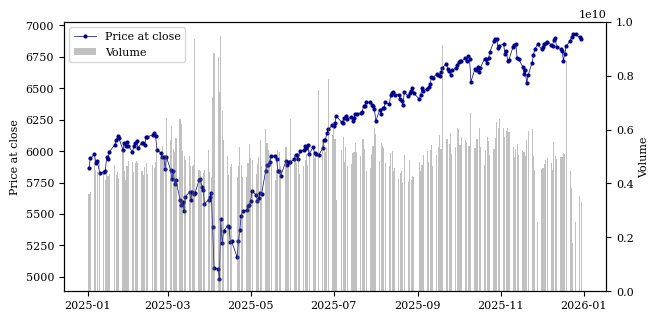

In [50]:
import matplotlib.pyplot as plt

fix, ax = plt.subplots(1, 1, figsize=(7,3.5))

# Plot closing price
price = ax.plot(daily.index, daily['Close'], color='darkblue', marker='o', ms=2, lw=0.5)
ax.set_ylabel('Price at close')

# Create secondary y-axis for trading volume
ax2 = ax.twinx()

# Plot trading volume as bar chart
volume = ax2.bar(daily.index, daily['Volume'], color='#666666', alpha=0.4, zorder=-1, lw=0)
ax2.set_ylim((0.0, 1.0e10))
ax2.set_ylabel('Volume')

# Add legend using handles returned by plot() and bar()
_ = ax.legend([price[0], volume[0]], ['Price at close', 'Volume'])

The above code uses 
[`twinx()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.twinx.html)
to create a second (invisible) $x$-axis with an independent $y$-axis which allows us to plot the trading volume on a different scale.

*Example: Retrieving data for multiple symbols*

We can download trading data for multiple symbols at once using the 
[`download()`](https://ranaroussi.github.io/yfinance/reference/api/yfinance.download.html#yfinance.download) 
function. 
Unlike the 
[`Ticker`](https://ranaroussi.github.io/yfinance/reference/api/yfinance.Ticker.html#yfinance.Ticker) 
class, this immediately returns a `DataFrame` containing data similar to the `history` method we called previously, but now the column index contains an additional level for each ticker symbol. 

For example, to get the trading data for Amazon and Microsoft for the last 3 months of 2025, we proceed as follows:

In [51]:
import yfinance as yf

# Ticker symbols for bulk download
tickers = 'AMZN', 'MSFT'

# Start date for data download
start = '2025-10-01'

# End date for data download
end = '2025-12-31'

# Get data for Amazon (AMZN) and Microsoft (MSFT) for last quarter of 2025
data = yf.download(tickers, start=start, end=end, auto_adjust=True)

[                       0%                       ]

[*********************100%***********************]  2 of 2 completed

Note that we are explicitly specifying the `auto_adjust=True` to illustrate its use (the default value is already `True` so you need not specify it unless you want to *turn off* auto-adjustment). This instructions `yfinance` to return price data that is adjusted for stock splits and dividends.

Inspecting the DataFrame returned by [`download()`](https://ranaroussi.github.io/yfinance/reference/api/yfinance.download.html#yfinance.download), we see that its columns are now a
[`MultiIndex`](https://pandas.pydata.org/docs/reference/api/pandas.MultiIndex.html)
with the various price metrics stored as the first level and individual ticker symbols as the second.

In [52]:
# Inspect first few rows
data.head(2)

Price            Close                    High                     Low  \
Ticker            AMZN        MSFT        AMZN        MSFT        AMZN   
Date                                                                     
2025-10-01  220.630005  518.739136  222.149994  519.537629  216.610001   
2025-10-02  222.410004  514.776550  222.809998  520.625589  218.949997   

Price                         Open                Volume            
Ticker            MSFT        AMZN        MSFT      AMZN      MSFT  
Date                                                                
2025-10-01  510.734099  217.360001  513.838274  43933800  22632300  
2025-10-02  509.726005  221.009995  516.673025  41258600  21222900

To extract data for a particular symbol, we have to take into account the hierarchical column index:

In [53]:
# Use hierarchical indexing to get data for Amazon
data[('Close', 'AMZN')].head()

Date
2025-10-01    220.630005
2025-10-02    222.410004
2025-10-03    219.509995
2025-10-06    220.899994
2025-10-07    221.779999
Name: (Close, AMZN), dtype: float64

To illustrate how this data can be used, we plot the daily returns for Amazon and Microsoft below:

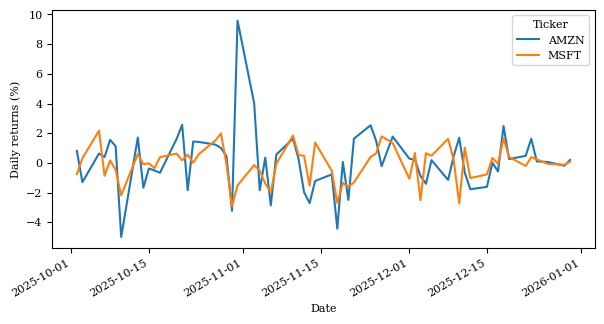

In [54]:
# Plot daily returns for both stocks
returns = data['Close'].pct_change() * 100.0
_ = returns.plot(y=['AMZN', 'MSFT'], ylabel='Daily returns (%)', figsize=(7, 3.5))

***
# Grouping and aggregation

## Aggregation and reduction

Similar to NumPy, pandas supports data aggregation and reduction functions 
such as computing sums or averages. By _"aggregation"_ or _"reduction"_ 
we mean that the result of a computation has a lower dimension than the original data: for example, the mean reduces a series of observations (1 dimension) into a scalar value (0 dimensions).

Unlike NumPy, these operations
can be applied to subsets of the data which have been
grouped according to some criterion. 

Such operations are often referred to as *split-apply-combine* (see the official [user guide](https://pandas.pydata.org/docs/user_guide/groupby.html)) as they involve these three steps:

1. *Split* data into groups based on some criteria;
2. *Apply* some function to each group separately; and
3. *Combine* the results into a single `DataFrame` or `Series`.

See also the pandas [cheat sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf) for an illustration of such operations.

### Aggregations of whole Series or DataFrames

The simplest way to perform data reduction is to invoke the desired
function on the entire `DataFrame`.

In [55]:
import pandas as pd

# Path to Titanic passenger data CSV file
file = f'{DATA_PATH}/titanic.csv'

# Read in Titanic passenger data, set PassenderId column as index
df = pd.read_csv(file, index_col='PassengerId')

# Compute mean of all numerical columns
df.mean(numeric_only=True)

Survived     0.383838
Pclass       2.308642
Age         29.699118
Fare        32.204208
dtype: float64

Methods such as [`mean()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html) 
are by default applied column-wise to each
column. The `numeric_only=True` argument is used to discard
all non-numeric columns (depending on the version of pandas, `mean()` will
issue a warning if there are non-numerical columns in the `DataFrame`).

One big advantage over NumPy is that missing values (represented
by `np.nan`) are automatically ignored:

In [56]:
# mean() automatically drops missing observations
mean_pandas = df['Age'].mean()

# Compare this to the NumPy variant:
import numpy as np

# Returns NaN since some ages are missing (coded as NaN)
mean_numpy = np.mean(df['Age'].to_numpy())

print(f'Mean using Pandas: {mean_pandas}')
print(f'Mean using NumPy:  {mean_numpy}')

Mean using Pandas: 29.69911764705882
Mean using NumPy:  nan


As we have seen previously, NumPy implements an additional set of aggregation functions which drop NaNs, for example [`np.nanmean()`](https://numpy.org/doc/2.0/reference/generated/numpy.nanmean.html).

### Aggregations of subsets of data (grouping)

Applying aggregation functions to the entire `DataFrame` is similar
to what we can do with NumPy. The added flexibility of pandas
becomes obvious once we want to apply these functions to subsets of
data, i.e., groups which we can define based on values or index labels.

For the remainder of this section, we use a 10% sample of the 
[Survey of Consumer Finances](https://www.federalreserve.gov/econres/scfindex.htm) 
(SCF) for the years 1989-2022.
The SCF is a triennial cross-sectional survey of U.S. households which includes information on balance sheets, pensions, income, and demographic characteristics.

We load the SCF data as follows:

In [57]:
# Path to SCF data file
file = f'{DATA_PATH}/SCF/SCF_10pct.csv'

# Read in SCF data, set id column as index
df = pd.read_csv(file, index_col='id')

This dataset contains the following mostly self-explanatory columns:

In [58]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 5817 entries, 1 to 5817
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        5817 non-null   int64  
 1   year       5817 non-null   int64  
 2   female     5817 non-null   int64  
 3   married    5817 non-null   int64  
 4   educ       5817 non-null   int64  
 5   empl       5817 non-null   int64  
 6   income     5817 non-null   float64
 7   rent       5817 non-null   float64
 8   equity     5817 non-null   float64
 9   finassets  5817 non-null   float64
 10  liqassets  5817 non-null   float64
 11  houses     5817 non-null   float64
 12  business   5817 non-null   float64
 13  vehicles   5817 non-null   float64
 14  assets     5817 non-null   float64
 15  mortages   5817 non-null   float64
 16  debt       5817 non-null   float64
 17  networth   5817 non-null   float64
 18  owner      5817 non-null   int64  
 19  weight     5817 non-null   float64
dtypes: float64(13

As a first example, we group the SCF sample by employment status (column `empl`) using 
[`groupby()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html):

In [59]:
# Group observations by employment status (1 = working for someone else, 
# 2 = self-employed, 3 = retired/disabled, 4 = not in labor force)
groups = df.groupby(['empl'])

Here `groups` is a special pandas objects which can subsequently be
used to process group-specific data. To compute the group-wise
averages, we simply run

In [60]:
# Compute group-specific means for ALL columns
groups.mean()

,age,year,female,married,educ,income,rent,equity,finassets,liqassets,houses,business,vehicles,assets,mortages,debt,networth,owner,weight
empl,,,,,,,,,,,,,,,,,,,
1,43.795960,2007.520202,0.239394,0.637374,2.917508,4.260747e+05,397.726214,1.438976e+06,2.040738e+06,119333.585657,4.130635e+05,1.060121e+06,106391.366968,3.900751e+06,123503.647677,223526.750640,3.677224e+06,0.617845,26727.697271
2,54.712018,2006.367347,0.075586,0.817838,3.359788,2.410422e+06,261.911157,5.603988e+06,8.996746e+06,820293.861980,1.632493e+06,2.029157e+07,210922.228408,3.510614e+07,297781.022902,759135.329403,3.434700e+07,0.876039,11787.453134
3,68.233807,2006.969194,0.347551,0.515798,2.614534,5.113619e+05,246.440889,3.353023e+06,5.441704e+06,360725.330016,5.758679e+05,1.823703e+06,67000.125811,9.187975e+06,47285.060585,88804.125355,9.099171e+06,0.733017,26611.096044
4,39.782946,2006.116279,0.445736,0.414729,2.600775,2.663478e+05,526.246509,4.780461e+05,9.799629e+05,126127.593798,2.415235e+05,5.517233e+05,21814.942094,2.059549e+06,32220.589147,55874.311240,2.003675e+06,0.360465,27140.389862


Groups support column indexing: if we want to only compute the
average age by employment status, we can do this as follows:

In [61]:
groups['age'].mean()

empl
1    43.795960
2    54.712018
3    68.233807
4    39.782946
Name: age, dtype: float64

#### Built-in aggregations

There are numerous routines to aggregate grouped data, for example:

- [`mean()`](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.mean.html):
    averages within each group
- [`sum()`](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.sum.html):
    sum values within each group
- [`std()`](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.std.html), 
    [`var()`](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.var.html): 
    within-group standard deviation and variance
-   [`median()`](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.median.html):
    compute median within each group    
- [`quantile()`](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.quantile.html):
    compute quantiles within each group
- [`size()`](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.size.html): 
    number of observations in each group
- [`count()`](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.count.html):
    number of non-missing observations in each group
- [`first()`](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.first.html), 
    [`last()`](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.last.html): 
    first and last elements in each group
-   [`min()`](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.min.html), 
    [`max()`](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.max.html): 
    minimum and maximum elements within a group

See the [official documentation](https://pandas.pydata.org/docs/user_guide/groupby.html#built-in-aggregation-methods) for a complete list.

*Example: Number of elements within each group*

In [62]:
groups.size()       # return number of elements in each group

empl
1    2970
2    1323
3    1266
4     258
dtype: int64

Note that `size()` and `count()` are two different functions. The former returns the group sizes (and the return value is a `Series`), whereas `count()` returns the number of non-missing observations for *each* column.

*Example: Return first observation of each group*

In [63]:
groups[['age', 'female', 'married']].first()      # return first observation in each group

,age,female,married
empl,,,
1,40,0,1
2,34,0,1
3,64,0,1
4,22,1,0


<div style="background-color: #c6dbef; color: #363636; padding: 0.8em 1em 0.5em 1em; border: 1pt solid #363636;">
<h3 style="font-weight: bold;">Your turn</h3>
Use the SCF data set to perform the following aggregations:
<ol>
    <li>Compute the average net worth (<TT>networth</TT>) by marital status (<TT>married</TT>).</li>
    <li>Compute the median value of the primary residence (<TT>houses</TT>) by education (<TT>educ</TT>).</li>
    <li>Compute the home ownership rate (<TT>owner</TT>) by marital status (<TT>married</TT>) <i>and</i> the sex of the household head (<TT>female</TT>).</li>
</ol>
</div>
<span style="display: none;">YourTurnEnd</span>

#### Writing custom aggregations

We can create custom aggregation routines by calling 
[`agg()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.agg.html)
(short-hand for [`aggregate()`](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.aggregate.html))
on the grouped object. Such functions operate on one column at a time, so it is only possible to use observations from that column for computations. 

For example, we can alternatively call the built-in aggregation functions we just covered via `agg()`:

In [64]:
# Calculate group means in needlessly complicated way
groups['age'].agg('mean')

# More direct approach:
# df.groupby('empl')['age'].mean()

empl
1    43.795960
2    54.712018
3    68.233807
4    39.782946
Name: age, dtype: float64

On the other hand, we _have to_ use [`agg()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.agg.html) if there is no built-in function to perform the desired aggregation.
To illustrate, imagine that we want to count the number of household heads aged 60+ by employment status. There is no built-in function to achieve this, so we need to use `agg()` combined with a custom function to perform the desired aggregation:

In [65]:
import numpy as np

# Count number of individuals age 60+ in each group
groups['age'].agg(lambda x: np.sum(x >= 60))

empl
1     374
2     459
3    1017
4      17
Name: age, dtype: int64

Note that we called [`agg()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.agg.html) only on the column `age`, otherwise
the function would be applied to every column separately, which is not
what we want.

#### Applying multiple functions at once

It is possible to apply multiple functions in a single call by passing a list of functions. These can be passed as strings or as callables (functions).

*Example: Applying multiple functions to a **single** column*

 To compute the mean and median age by employment status, we proceed as follows:

In [66]:
groups['age'].agg(['mean', 'median'])

,mean,median
empl,,
1,43.795960,43.0
2,54.712018,55.0
3,68.233807,69.0
4,39.782946,39.0



Note that we could have also specified these function by passing references to the corresponding NumPy functions instead:

In [67]:
df.groupby('empl')['age'].agg([np.mean, np.median])

/tmp/ipykernel_1359588/2161376742.py:1: FutureWarning: The provided callable <function mean at 0x7f89e00b5c60> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby('empl')['age'].agg([np.mean, np.median])
/tmp/ipykernel_1359588/2161376742.py:1: FutureWarning: The provided callable <function median at 0x7f89d1788a40> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df.groupby('empl')['age'].agg([np.mean, np.median])


,mean,median
empl,,
1,43.795960,43.0
2,54.712018,55.0
3,68.233807,69.0
4,39.782946,39.0


The following more advanced syntax allows us to create new column names using existing columns and some operation:

```python
    groups.agg(
        new_column_name1=('column_name1', 'operation1'),
        new_column_name2=('column_name2', 'operation2'),
        ...
    )
```
This is called ["named aggregation"](https://pandas.pydata.org/docs/user_guide/groupby.html#named-aggregation)
as the keywords determine the output column _names_.

*Example: Applying multiple functions to **multiple** columns*

The following code computes the median age, the smallest net worth, and the share of female household heads by employment status in a single operation:

In [68]:
# Compute multiple statistics for multiple columns
groups.agg(
    median_age=('age', 'median'), 
    min_networth=('networth', 'min'),
    share_female=('female', 'mean')
)

,median_age,min_networth,share_female
empl,,,
1,43.0,-4069933.6,0.239394
2,55.0,-2712279.9,0.075586
3,69.0,-388230.5,0.347551
4,39.0,-1034938.5,0.445736


Finally, the most flexible aggregation method is [`apply()`](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.apply.html) which calls a
given function, passing the _entire_ group-specific subset of data (including
all columns) as an argument. You need to use `apply()` if data from more than one column is required to compute a statistic of interest.

<div style="background-color: #c6dbef; color: #363636; padding: 0.8em 1em 0.5em 1em; border: 1pt solid #363636;">
<h3 style="font-weight: bold;">Your turn</h3>
Use the SCF data set to perform the following aggregations:
<ol>
    <li>Compute the minimum, maximum and average age (<TT>age</TT>) by marital status <i>and</i> sex (<TT>married</TT> and <TT>female</TT>) in a single <TT>agg()</TT> operation.</li>
    <li>Compute the number of observations, the home ownership rate (<TT>owner</TT>), and median net worth (<TT>networth</TT>) by education level (<TT>educ</TT>) in a single <TT>agg()</TT> operation.
</ol>
</div>
<span style="display: none;">YourTurnEnd</span>

## Transformations

In the previous section, we combined grouping and reduction, i.e., data at the group level was reduced to a single statistic such as the mean. Alternatively, we can combine grouping with the
[`transform()`](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.transform.html) function which assigns the result of a computation to each observation within a group and consequently leaves the number of observations unchanged.

For example, for _each_ observation we could compute the home ownership rate by eduction as follows:

In [69]:
df['frac_owners'] = df.groupby('educ')['owner'].transform('mean')

# Print relevant columns
df[['educ', 'owner', 'frac_owners']].head(10)

,educ,owner,frac_owners
id,,,
1,2,1,0.610607
2,2,1,0.610607
3,2,0,0.610607
4,2,1,0.610607
5,1,0,0.524887
6,1,1,0.524887
7,3,1,0.611952
8,1,0,0.524887
9,1,0,0.524887


As you can see, instead of collapsing the `DataFrame` to only 4 observations (one for each education level), the number of observations remains the same, and the home ownership rate is constant within each education level. 

When would we want to use `transform()` instead of aggregation? Such use cases arise whenever we want to perform computations that include the individual value as well as an aggregate statistic.

*Example: Deviation from median net worth*

Assume that we want to compute how much each household's net worth differs from the median net worth in their respective education group. We could compute this using [`transform()`](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.transform.html) as follows:

In [70]:
# Compute difference of HH's net worth from median net worth in same education group
df['nw_diff'] = df['networth'] - df.groupby('educ')['networth'].transform('median')

# Print relevant columns
df[['educ', 'networth', 'nw_diff']].head(10)

,educ,networth,nw_diff
id,,,
1,2,234478.0,136351.9
2,2,61513.0,-36613.1
3,2,-622.5,-98748.6
4,2,587924.1,489798.0
5,1,691.7,-27449.4
6,1,62481.3,34340.2
7,3,11124446.8,10993179.8
8,1,-1475.6,-29616.7
9,1,0.0,-28141.1


<div style="background-color: #c6dbef; color: #363636; padding: 0.8em 1em 0.5em 1em; border: 1pt solid #363636;">
<h3 style="font-weight: bold;">Your turn</h3>
Use the SCF data set to answer the following questions:
<ol>
    <li>Compute how much a household pays more in rent (<TT>rent</TT>) than the average household with the same 
    marital (<TT>married</TT>) and employment status (<TT>empl</TT>). Restrict your analysis
    to households who do not own their residence (<TT>owner = 0</TT>).</li>
</ol>
</div>
<span style="display: none;">YourTurnEnd</span>

***
## Resampling and aggregation

We introduced support for time series data in pandas in the previous lecture. This basically comes down
to specifying an index which is a date or time stamp and supports operations such as computing leads, lags,
and differences over time.

Another useful feature of the time series support in pandas is *resampling* which is used to group observations by time period and apply some aggregation function.
This can be accomplished using the 
[`resample()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html)
method which in its simplest form takes a string argument that describes how observations should be grouped
(`'YE'` for aggregation to years, `'QE'` for quarters, `'ME'` for months, `'W'` for weeks, etc.).

To illustrate, we load the daily data on the value of the NASDAQ at close:

In [71]:
# Path to NASDAQ data file
file = f'{DATA_PATH}/stockmarket/NASDAQ.csv'

# Read in NASDAQ data, set Date column as index
df = pd.read_csv(file, index_col='Date', parse_dates=True)

# Keep observations after 2025
df = df.loc['2025':]

# Print first few rows
df.head()

,NASDAQ
Date,
2025-01-02,19280.8
2025-01-03,19621.7
2025-01-06,19865.0
2025-01-07,19489.7
2025-01-08,19478.9


For example, if we want to aggregate this daily data to monthly frequency, we would use [`resample('ME')`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html). This returns an object which is very similar to the one returned by `groupby()` we studied previously, and we can call various aggregation methods such as `mean()`:

In [72]:
# Resample to monthly frequency, aggregate to mean of daily observations 
# within each month
df.resample('ME').mean()

,NASDAQ
Date,
2025-01-31,19565.045000
2025-02-28,19547.284211
2025-03-31,17828.028571
2025-04-30,16678.466667
2025-05-31,18642.361905
...,...
2025-08-31,21383.590476
2025-09-30,22188.600000
2025-10-31,23003.134783


Similarly, we can use [`resample('W')`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) to resample to weekly frequency. Below,
we combine this with the aggregator 
[`last()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.last.html) 
to return the last observation of each week (weeks by default start on Sundays):

In [73]:
# Return last observation of each week, print first 10 rows
df.resample('W').last().head(10)

,NASDAQ
Date,
2025-01-05,19621.7
2025-01-12,19161.6
2025-01-19,19630.2
2025-01-26,19954.3
2025-02-02,19627.4
2025-02-09,19523.4
2025-02-16,20026.8
2025-02-23,19524.0
2025-03-02,18847.3


<div style="background-color: #c6dbef; color: #363636; padding: 0.8em 1em 0.5em 1em; border: 1pt solid #363636;">
<h3 style="font-weight: bold;">Your turn</h3>
<p>
Use the daily NASDAQ data for 2025 and compute the percentage change from the first to the last trading day within each month.
</p>
</div>
<span style="display: none;">YourTurnEnd</span>

***
# Concatenating and merging data

More often than not, data sets come from various sources and need to be concatenated (the process of appending observations or variables) or merged as part of data pre-processing. Pandas offers several routines to accomplish such tasks which we study in this section:

1. [`pd.concat()`](https://pandas.pydata.org/docs/reference/api/pandas.concat.html) allows us to combine multiple Series or DataFrames by appending observations (rows) or columns.
2. [`pd.merge()`](https://pandas.pydata.org/docs/reference/api/pandas.merge.html) allows us to match observations from one Series or DataFrame with observations from another Series or DataFrame and combine these into a _merged_ DataFrame.

You can also consult the official 
[user guide](https://pandas.pydata.org/docs/user_guide/merging.html) 
and the pandas 
[cheat sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf) 
for more information.

***
## Concatenation

Concatenation with [`pd.concat()`](https://pandas.pydata.org/docs/reference/api/pandas.concat.html) is used to combine multiple data sets along the row or column axes. This function can be called with both `Series` and `DataFrame` arguments, as we illustrate below.

### Concatenating Series

We begin with the simplest case of combining two `Series` to obtain a new `Series` which contains observations from both.

*Example: Concatenating two Series along the row axis*

In [74]:
import pandas as pd 

# Create first series of 3 observations
a = pd.Series(['A1', 'A2', 'A3'])
a

0    A1
1    A2
2    A3
dtype: object

In [75]:
# Data for second series (5 observations)
data_b = [f'B{i}' for i in range(5)]

# Create second series
b = pd.Series(data_b)
b

0    B0
1    B1
2    B2
3    B3
4    B4
dtype: object

To concatenate `a` and `b` along the first dimension, we call [`pd.concat()`](https://pandas.pydata.org/docs/reference/api/pandas.concat.html) as follows:

In [76]:
# Call concat() with the default value for axis, which is axis=0
s = pd.concat((a, b))

# Alternatively, make explicit that we are concatenating along the row axis
# s = pd.concat((a, b), axis=0)
s

0    A1
1    A2
2    A3
0    B0
1    B1
2    B2
3    B3
4    B4
dtype: object

As you can see, [`pd.concat()`](https://pandas.pydata.org/docs/reference/api/pandas.concat.html) also concatenates the index, which has the undesirable effect that the index values are no longer unique. We can rectify this with the [`reset_index()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html) method hat we encountered in previous units:

In [77]:
# Reset index to get rid of duplicates
s = s.reset_index(drop=True)
s

0    A1
1    A2
2    A3
3    B0
4    B1
5    B2
6    B3
7    B4
dtype: object

*Example: Concatenating along the column axis*

It is also possible to concatenate `Series` along the column dimension by specifying `axis=1`. We would usually use this only for `Series` of equal length, as the result otherwise contains `NaN` values if the Series have different indices (e.g., because they differ in the number of observations).

In [78]:
s = pd.concat((a, b), axis=1)
s

,0,1
0,A1,B0
1,A2,B1
2,A3,B2
3,NaN,B3
4,NaN,B4


If the `Series` in question have no names, pandas assigns the values `0`, `1`, ... as column names. This can be avoided by explicitly passing the desired column names using the `keys` argument:

In [79]:
s = pd.concat((a, b), axis=1, keys=['Variable1', 'Variable2'])
s

,Variable1,Variable2
0,A1,B0
1,A2,B1
2,A3,B2
3,NaN,B3
4,NaN,B4


<div style="background-color: #c6dbef; color: #363636; padding: 0.8em 1em 0.5em 1em; border: 1pt solid #363636;">
<h3 style="font-weight: bold;">Your turn</h3>
<ol>
    <li>Create a new <TT>Series</TT> with observations <TT>['C1', 'C2']</TT>.</li>
    <li>Using the previously created <TT>Series</TT> <TT>a</TT> and <TT>b</TT>, concatenate all three objects along the row axis and create a new (unique) index.</li>
    <li>Repeat the previous step, but now concatenate along the column axis. Assign the column names <TT>'Column1'</TT>, <TT>'Column2'</TT>, and <TT>'Column3'</TT>.</li>
</ol>
</div>
<span style="display: none;">YourTurnEnd</span>

### Concatenating DataFrames

Concatenating DataFrames works exactly the same way as for Series.

#### Concatenating along the column axis

*Example: Concatenating two DataFrames along the column axis*

In this example, we create two DataFrames with two and three columns, respectively.

In [80]:
import numpy as np

# Create 2 x 2 array of string data
data_a = np.array(('A1', 'A2', 'A3', 'A4')).reshape((2, 2))

df_a = pd.DataFrame(data_a)
df_a

,0,1
0,A1,A2
1,A3,A4


In [81]:
# Create 2 x 3 array of string data
data_b = np.array([f'B{i}' for i in range(6)]).reshape((2, 3))

df_b = pd.DataFrame(data_b)
df_b

,0,1,2
0,B0,B1,B2
1,B3,B4,B5


To create a new DataFrame which contains the columns from both `df_a` and `df_b`, we use `pd.concat(..., axis=1)`:

In [82]:
# Concatenate along the column axis
df = pd.concat((df_a, df_b), axis=1)
df

,0,1,0,1,2
0,A1,A2,B0,B1,B2
1,A3,A4,B3,B4,B5


As before, the resulting `DataFrame` can have non-unique column names which is undesirable. There is no `reset_index()` method for columns, but we can easily create unique column names, e.g., as follows:

In [83]:
# Reset column index to 0, 1, 2,...
df.columns = np.arange(len(df.columns))
df

,0,1,2,3,4
0,A1,A2,B0,B1,B2
1,A3,A4,B3,B4,B5


It is also possible to add a second level of the column names to the resulting `DataFrame` by specifying the `keys` argument:

In [84]:
# Concatenate along column axis, add additional column index level [A, B]
df = pd.concat((df_a, df_b), axis=1, keys=['A', 'B'])
df

A       B        
    0   1   0   1   2
0  A1  A2  B0  B1  B2
1  A3  A4  B3  B4  B5

The new `DataFrame` then has a so-called hierarchical column index.

*Example: Concatenating a DataFrame and a Series*

One can also concatenate DataFrames and Series object along the column axis. In that case, the `Series` is automatically converted to a `DataFrame` using the default column name.

In [85]:
s = pd.Series(['C1', 'C2'])
s

0    C1
1    C2
dtype: object

In [86]:
# Concatenate DataFrame and Series
pd.concat((df_a, s), axis=1)

,0,1,0
0,A1,A2,C1
1,A3,A4,C2


#### Concatenating along the row axis

We usually concatenate DataFrames along the row axis if we have observations on the same variables scattered across multiple data sets. Appending DataFrames with different columns will usually create `NaN` values and hence is often not useful.

*Example: Concatenating rows with identical columns*

In [87]:
#  Concatenate 2x2 DataFrame and 3x2 DataFrame (note the transpose!)
df = pd.concat((df_a, df_b.T), axis=0)
df

,0,1
0,A1,A2
1,A3,A4
0,B0,B3
1,B1,B4
2,B2,B5


*Example: Concatenating rows with different columns*

The DataFrames `df_a` and `df_b` have a different number of columns, so the resulting `DataFrame` will contain `NaN` for all observations of column `2` that were originally in `df_a`:

In [88]:
# Concatenate DataFrame rows with different numbers of columns
df = pd.concat((df_a, df_b), axis=0)
df

,0,1,2
0,A1,A2,NaN
1,A3,A4,NaN
0,B0,B1,B2
1,B3,B4,B5


<div style="background-color: #c6dbef; color: #363636; padding: 0.8em 1em 0.5em 1em; border: 1pt solid #363636;">
<h3 style="font-weight: bold;">Your turn</h3>
Use the data files located in the folder <TT>../../data/FRED</TT> to perform the following tasks:
<ol>
    <li>Load the data in <TT>FRED_monthly_1950.csv</TT> and <TT>FRED_monthly_1960.csv</TT> into two different DataFrames.
        The files contain monthly macroeconomic time series for the 1950s and 1960s, respectively.
        <p>
        <i>Hint:</i> Use <TT>pd.read_csv(..., parse_dates=['DATE'])</TT> to automatically parse strings stored in the <TT>DATE</TT> column as dates.
        </p>
        </li>
    <li>Concatenate these DataFrames along the row dimension to get a total of 240 observations.</li>
    <li>Set the column <TT>DATE</TT> as index for the newly created DataFrame.</li>
</ol>
</div>
<span style="display: none;">YourTurnEnd</span>

***
## Merging and joining data sets

### Types of merges

While concatenation simply appends a block of rows or columns from multiple data sets, merging allows for more fine-grained control over how data should be combined. The most common scenarios in empirical work are:

1.  *one-to-one*: The observations in data sets `A` and `B` have a unique identifier (_"key"_), and each observation in `A` is matched with at most one observation in `B`. For example, we could have data on individuals from multiple sources, and each of these data sets identifies individuals by their social security number. Each observation in one data set corresponds to exactly one observation in the other data set.
2.  *many-to-one*: Data set `A` contains unique identifiers but these can correspond to multiple observations in data set `B`. For example, we could have data at the ZIP-code (neighborhood) level in data set `A` and data on individuals in data set `B`. ZIP-codes are a unique identifier in `A`, but many individuals can live in the same neighboorhood, so each observation in `A` can reasonably be matched with many different observations in `B`.
3.  *many-to-many*: Identifying keys are not unique in either data set, and the resulting data set is a Cartesian product of all possible key combinations from both data sets. This situation should usually be avoided as it tends to have surprising results and can potentially consume large amounts of memory.

### Implementation in pandas

Merging in pandas can be performed in two different ways:

1.  [`pd.merge()`](https://pandas.pydata.org/docs/reference/api/pandas.merge.html) is a function that takes as argument the *two* DataFrames to be merged,
    e.g.,
    
    ```python
    result = pd.merge(df_A, df_B)
    ```
2.  [`df.merge()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html) is a method of a specific `DataFrame` object, and takes as an 
    argument the other `DataFrame` to be merged, e.g.,
    
    ```python
    result = df_A.merge(df_B)
    ```
    
Both ways are equivalent and can be used interchangeably.

### Controlling the resulting data set

Irrespective of whether we perform a _one-to-one_ or a _many-to-one_ merge, we frequently face the situation that some observations are present in one data set but not the other. We therefore need to control which subset of the data we want to retain in the final data set. This is accomplished using the `how` argument passed to `merge()`. There are several possible merge methods
which were originally introduced in SQL, a data processing language for relational databases
(see also the official [user guide](https://pandas.pydata.org/docs/user_guide/merging.html#merge-types)):

1.  `how='inner'` performs a so-called _inner join_: the merged data contains only the _intersection_ of keys that are present in _both_ data sets.
2.  `how='outer'` performs an _outer join_: the merged data contains the _union_ of keys present in either of the data sets. Rows which are not present in both data sets will contain missing values.
3.  `how='left'` performs a _left join_: all identifiers from the _left_ data set are present in the merge result, but 
    rows that are only present in the _right_ data set are dropped.
4.  `how='right'` performs a _right join_: all identifiers from the _right_ data set are present in the merge result, but 
    rows that are only present in the _left_ data set are dropped.

The following figure illustrates these concepts graphically using Venn diagrams. Each circle represents the keys present in the left (`df1`) or right (`df2`) DataFrames. The merge method controls which subset of keys is retained in the merge result.

![Join types](join-methods.png)

***
### Merging with `merge()`

We first create two data sets `A` and `B` used to demonstrate various merge methods. We use the column `key` as the identifier on which to perform merges.

In [89]:
# Create first DataFrame with 2 rows
df_a = pd.DataFrame({'key': [0, 1], 'value_a': ['A0', 'A1']})
df_a

,key,value_a
0,0,A0
1,1,A1


In [90]:
# Create second DataFrame with 2 rows
df_b = pd.DataFrame({'key': [1, 2], 'value_b': ['B1', 'B2']})
df_b

,key,value_b
0,1,B1
1,2,B2


#### Using `pd.merge()`

When merging two DataFrames, in most cases we need to specify the columns (or index levels) on which the merge should be performed. We do this using the argument `on` when calling [`pd.merge()`](https://pandas.pydata.org/docs/reference/api/pandas.merge.html) or [`df.merge()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html)

*Example: one-to-one merges*

In [91]:
# Merge A and B on the identifier 'key' using an inner join
pd.merge(df_a, df_b, on='key', how='inner')

,key,value_a,value_b
0,1,A1,B1


Note that in this case we could leave the `on` argument unspecified, as then [`pd.merge()`](https://pandas.pydata.org/docs/reference/api/pandas.merge.html) by default merges on the intersection of columns present in both DataFrames (which in this case is just the column `key`). However, for clarity it is advisable to always specify `on` explicitly.

Moreover, [`pd.merge()`](https://pandas.pydata.org/docs/reference/api/pandas.merge.html) performs an inner join by default, so we could have called the function as follows to get the same result:

In [92]:
# Merge A and B on default key using default inner join
pd.merge(df_a, df_b)

,key,value_a,value_b
0,1,A1,B1


Since we are performing an inner join, the merged data set contains only a single row corresponding to the identifier `1`, the only one present on both DataFrames.

If we want to retain all observations, we achieve this using an outer join:

In [93]:
# Merge A and B using outer join (keep union of observations)
pd.merge(df_a, df_b, on='key', how='outer')

,key,value_a,value_b
0,0,A0,NaN
1,1,A1,B1
2,2,NaN,B2


Since the keys `0` and `2` are not present in both DataFrames, the corresponding columns contain missing values.

We can also only retain the keys present in the left (i.e., the first argument) or the right (i.e., the second argument) DataFrame:

In [94]:
# Merge A and B on the identifier 'key', keep left identifiers
pd.merge(df_a, df_b, on='key', how='left')

,key,value_a,value_b
0,0,A0,NaN
1,1,A1,B1


In [95]:
# Merge A and B on the identifier 'key', keep right identifiers
pd.merge(df_a, df_b, on='key', how='right')

,key,value_a,value_b
0,1,A1,B1
1,2,NaN,B2


#### Using `DataFrame.merge()`

As mentioned above, there is an alternative but equivalent way to merge DataFrames using the method
[`df.merge()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html).
In this context, the _left_ `DataFrame` is the one on which `merge()` is being invoked, while the _right_ `DataFrame`
is the argument passed to `merge()`:

In [96]:
# Use DataFrame method to merge, keep only left identifiers
df_a.merge(df_b, on='key', how='left')

,key,value_a,value_b
0,0,A0,NaN
1,1,A1,B1


In [97]:
# Now df_a is the right DataFrame, set of final identifiers is the same as
# in the example above!
df_b.merge(df_a, on='key', how='right')

,key,value_b,value_a
0,0,NaN,A0
1,1,B1,A1


*Example: Merging with overlapping column names*

Sometimes both DataFrames contain the same column names. If these columns are not used as keys in the merge operation, pandas automatically renames these columns in the resulting `DataFrame` to avoid naming clashes.

To illustrate, we rename the value columns to `'value'` in both DataFrames and then perform the merge:

In [98]:
# Rename columns to common name 'value'
df_a = df_a.rename(columns={'value_a': 'value'})
df_b = df_b.rename(columns={'value_b': 'value'})

Note that once we have identical column names `['key', 'value']` in both DataFrames, we _must_ specify the `on` argument to `merge()` as otherwise pandas by default merges on the intersection on column names in both DataFrames, i.e., in this case it merges on `['key', 'value']`:

In [99]:
# Invoking merge() with default on argument has unintended consequences
df_a.merge(df_b)

,key,value


The merge result is empty because we are performing an _inner join_ (the default), and there are no overlapping rows that have the same values for both `key` and `value` columns. We therefore need to explicitly specify `on='key'` to get the desired result:

In [100]:
# Merge DataFrames with overlapping column 'value'
df_a.merge(df_b, on='key')

,key,value_x,value_y
0,1,A1,B1


In [101]:
df_a.merge(df_b, on='key', suffixes=('_left', '_right'))

,key,value_left,value_right
0,1,A1,B1


<div style="background-color: #c6dbef; color: #363636; padding: 0.8em 1em 0.5em 1em; border: 1pt solid #363636;">
<h3 style="font-weight: bold;">Your turn</h3>
Use the data files located in the folder <TT>../../data/FRED</TT> to perform the following tasks:
<ol>
    <li>Load the data in <TT>CPI.csv</TT> and <TT>GDP.csv</TT> into two different DataFrames.
        The files contain monthly data for the Consumer Price Index (CPI) and quarterly data for GDP, respectively.
        <p>
        <i>Hint:</i> Use <TT>pd.read_csv(..., parse_dates=['DATE'])</TT> to automatically parse strings stored in the <TT>DATE</TT> column as dates.
        </p>
        </li>
    <li>Merge the CPI with the GDP time series with 
    <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html"><TT>merge()</TT></a> 
    using a left join (<TT>how='left'</TT>). How many observations does the resulting DataFrame have?</li>
    <li>Merge the CPI with the GDP time series with <TT>merge()</TT> using an inner join (<TT>how='inner'</TT>). How many observations does the resulting DataFrame have,
        and why is this different from the previous case?</li>
</ol>
</div>
<span style="display: none;">YourTurnEnd</span>

***
### Joining with `join()`

The `DataFrame` method 
[`join()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html) 
is a convenience wrapper around 
[`pd.merge()`](https://pandas.pydata.org/docs/reference/api/pandas.merge.html)
with the following subtle differences:

1.  [`join()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html) can be called _only_ directly on the `DataFrame` object, i.e., `df.join()`, while for merge we have both the `pd.merge()`
    and the `df.merge()` variants.
2.  [`join()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html) always operates on the _index_ of the other `DataFrame`, whereas `merge()` is more flexible and can operate on either the index or on columns.
3.  [`join()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html) by default performs a `left` join, whereas `merge()` performs an `inner` join.

As a rule of thumb, you should use [`join()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html) if you want to join DataFrames which have a similar index.

*Example: joining DataFrames*

We first create two DataFrames to be joined. This time, we explicitly set an index for each of them which will be used to perform the [`join()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html).

In [102]:
# Create first DataFrame with 2 rows
df_a = pd.DataFrame(['A0', 'A1'], columns=['value_a'], index=[0, 1])
df_a

,value_a
0,A0
1,A1


In [103]:
# Create second DataFrame with 2 rows
df_b = pd.DataFrame(['B1', 'B2'], columns=['value_b'], index=[1, 2])
df_b

,value_b
1,B1
2,B2


In [104]:
# Perform left join (the default option)
df_a.join(df_b)

,value_a,value_b
0,A0,NaN
1,A1,B1


In [105]:
# Join with explicit inner join
df_a.join(df_b, how='inner')

,value_a,value_b
1,A1,B1


In [106]:
# Perform an outer join
df_a.join(df_b, how='outer')

,value_a,value_b
0,A0,NaN
1,A1,B1
2,NaN,B2


<div style="background-color: #c6dbef; color: #363636; padding: 0.8em 1em 0.5em 1em; border: 1pt solid #363636;">
<h3 style="font-weight: bold;">Your turn</h3>
Use the data files located in the folder <TT>../../data/FRED</TT> to perform the following tasks:
<ol>
    <li>Load the data in <TT>CPI.csv</TT> and <TT>GDP.csv</TT> into two different DataFrames.
        The files contain monthly data for the Consumer Price Index (CPI) and quarterly data for GDP, respectively.
        <br/>
        <i>Hint:</i> Use <TT>pd.read_csv(..., parse_dates=['DATE'])</TT> to automatically parse strings stored in the <TT>DATE</TT> column as dates.
        </li>
    <li>Set the <TT>DATE</TT> column as the index for each of the two DataFrames.</li>
    <li>Merge the CPI with the GDP time series with 
    <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html"><TT>join()</TT></a>. 
    Do this with both a left and an inner join.</li>
</ol>
</div>
<span style="display: none;">YourTurnEnd</span>

***
# Dealing with missing values

We already encountered missing values in earlier lectures. These are particularly likely to arise when merging or concatenating data if individual DataFrames lack some observations. 

To illustrate, recall the example from above:

In [107]:
# Create two DataFrames with partially overlapping keys
df_a = pd.DataFrame({'key': [0, 1], 'value_a': ['A0', 'A1']})
df_b = pd.DataFrame({'key': [1, 2], 'value_b': ['B1', 'B2']})

In [108]:
# Perform outer merge, keep union of keys
pd.merge(df_a, df_b, on='key', how='outer')

,key,value_a,value_b
0,0,A0,NaN
1,1,A1,B1
2,2,NaN,B2


Since they keys in DataFrames `df_a` and `df_b` were only partially overlapping, the resulting DataFrame has missing values by construction. In what follows, we explore strategies on how to handle these missing data.

## Dropping missing values

One strategy is to drop missing values outright, even though we might lose information that could be useful to perform data analysis if only some but not all columns are missing, as is the case above.

Missing values can be dropped by either

1. Using [`dropna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)
    or selecting a subset of observations with a boolean operation such as 
    [`notna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.notna.html).
2. Avoiding the missing values in the first place, e.g., by using `merge(..., how='inner')`.

*Example: Dropping missing values*

Consider the merged `DataFrame` from above. We can drop rows with missing values with [`dropna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html), which by default drops all rows with _any_ missing values. Alternatively, we can specify only a subset of columns to be checked for missing values.

In [109]:
# Merge with outer join, thus creating missing values
df = pd.merge(df_a, df_b, on='key', how='outer')

In [110]:
# Drop any row which contains at least one missing value
df.dropna()

,key,value_a,value_b
1,1,A1,B1


In [111]:
# Drop rows which contain missing values in column 'value_a', ignore missing
# values in 'value_b'
df.dropna(subset='value_a')

,key,value_a,value_b
0,0,A0,NaN
1,1,A1,B1


*Example: Avoiding missing values in the first place*

Of course the missing values in the example above arose only because we specified `how='outer'`. Merging with `how='inner'` drops keys which are not present in both DataFrames right away, avoiding the issue of missing values (unless these are already present in the original DataFrames):

In [112]:
# Merge using inner join, drop keys not present in both DataFrames
pd.merge(df_a, df_b, on='key', how='inner')

,key,value_a,value_b
0,1,A1,B1


## Filling missing values

Instead of dropping data, we can impute missing values in various ways:

1.  [`fillna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html) can be used to replace missing data with user-specified values.
2.  [`ffill()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.ffill.html) and 
    [`bfill()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.bfill.html) can be used to fill missing values
    forward or backward from adjacent non-missing observations.
3.  [`interpolate()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html) supports various interpolation methods such as linear interpolation based on non-missing values.

*Example: Replacing missing values with `fillna()`*

Consider the merged `DataFrame` we have created above:

In [113]:
df = pd.merge(df_a, df_b, on='key', how='outer')
df

,key,value_a,value_b
0,0,A0,NaN
1,1,A1,B1
2,2,NaN,B2


We can use [`fillna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html) to replace missing values with some constant.

In [114]:
# Replace ALL missing values with 'Some value'
df.fillna('Some value')

,key,value_a,value_b
0,0,A0,Some value
1,1,A1,B1
2,2,Some value,B2


This might not be what you want as the provided non-missing value is imposed on _all_ columns. It is therefore possible to specify a different value for each column using a dictionary as an argument.

In [115]:
# Use different replacement values for columns 'value_a' and 'value_b'
df.fillna({'value_a': 'Missing A', 'value_b': 'Missing B'})

,key,value_a,value_b
0,0,A0,Missing B
1,1,A1,B1
2,2,Missing A,B2


*Example: forward- or backward-filling missing values*

Another common imputation method is to use the previous (_"forward"_) or next (_"backward"_) non-missing value as replacement for missing data.

Continuing with the `DataFrame` from the previous example, we can apply these methods as follows:

In [116]:
# Forward-fill missing values from previous observation
df.ffill()

,key,value_a,value_b
0,0,A0,NaN
1,1,A1,B1
2,2,A1,B2


This inserts the value `'A1'` in the 3rd row of column `value_a`, but does not do anything about the missing value in column `value_b` since there is no preceding non-missing value.

Conversely, `bfill()` does the opposite and backfills the missing value in column `value_b`:

In [117]:
df.bfill()

,key,value_a,value_b
0,0,A0,B1
1,1,A1,B1
2,2,NaN,B2


*Example: linear interpolation*

Consider the following `Series` with numerical data (interpolation only makes sense for numerical data, not strings):

In [118]:
s = pd.Series([1.0, 2.0, 3.0, np.nan, 5.0])
s

0    1.0
1    2.0
2    3.0
3    NaN
4    5.0
dtype: float64

We can interpolate the missing data using 
[`interpolate()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.interpolate.html),
for example by using linear interpolation (check the documentation for many other interpolation methods).

In [119]:
# Interpolate missing values using linear interpolation
s.interpolate(method='linear')

0    1.0
1    2.0
2    3.0
3    4.0
4    5.0
dtype: float64

<div style="background-color: #c6dbef; color: #363636; padding: 0.8em 1em 0.5em 1em; border: 1pt solid #363636;">
<h3 style="font-weight: bold;">Your turn</h3>
Use the data files located in the folder <TT>../../data/FRED</TT> to perform the following tasks:
<ol>
    <li>Load the data in <TT>CPI.csv</TT> and <TT>GDP.csv</TT> into two different DataFrames.
        The files contain monthly data for the Consumer Price Index (CPI) and quarterly data for GDP, respectively.
        <br/>
        <i>Hint:</i> Use <TT>pd.read_csv(..., parse_dates=['DATE'])</TT> to automatically parse strings stored in the <TT>DATE</TT> column as dates.
        </li>
    <li>Merge the CPI with the GDP time series with <TT>merge()</TT> using a left join. This creates missing values in the <TT>GDP</TT>
    column.</li>
    <li>Impute the missing GDP values using <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.interpolate.html"><TT>interpolate()</TT></a> 
    and replace the missing values in column <TT>GDP</TT>.</li>
</ol>
</div>
<span style="display: none;">YourTurnEnd</span>